In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [53]:
from src.data import *
from src.graph_nn import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
f(2)

9

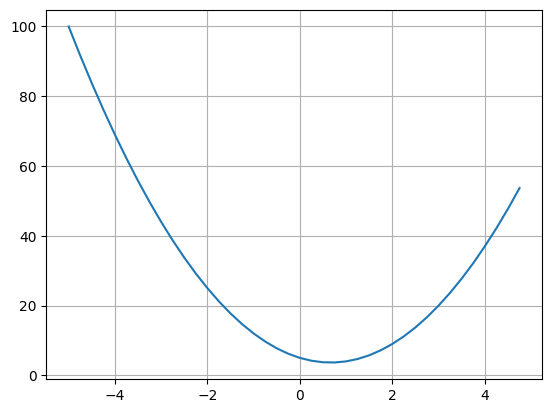

In [55]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)
plt.grid()

In [5]:
h = 0.0000001
x = -3.0
(f(x+h) - f(x))/h

-21.999999688659955

In [6]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [7]:
h = 0.0000001

a = 2.0
b = -3.0
c = 10.0


d1 = a*b + c
a += h
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 3.9999997
slope -2.9999999995311555


In [8]:
h = 0.0000001

a = 2.0
b = -3.0
c = 10.0


d1 = a*b + c
b += h
d2 = a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.0000002
slope 1.9999999967268423


In [9]:
a+b

-0.9999999000000002

In [10]:
d = a*b+c

Initial values

In [11]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L

Value(data=-8.0)

Manual backward propagation

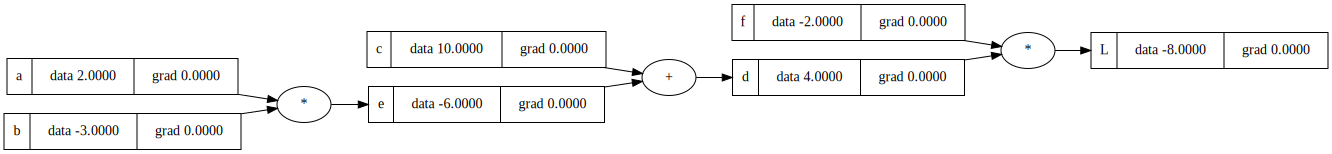

In [12]:
draw_dot(L)

L = L

dL/dL = 1

In [13]:
L.grad = 1.0

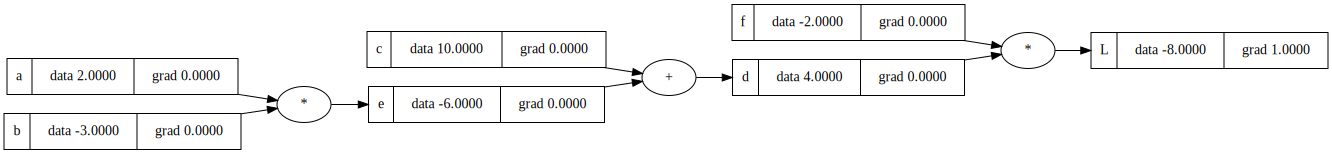

In [14]:
draw_dot(L)

$$
\begin{align*}
L &= d \cdot f \\
\frac{dL}{dd} &= f \\
\frac{f(x+h) + f(a)}{h} &= \frac{(d+h) \cdot f - d \cdot f}{h} \\
&= \frac{d \cdot f + h \cdot f - d \cdot f}{h} \\
&= \frac{h \cdot f}{h} \\
&= f
\end{align*}
$$


In [15]:
f.grad = d.data
d.grad = f.data

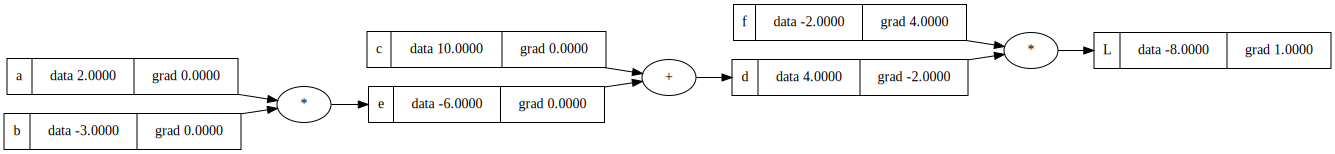

In [16]:
draw_dot(L)

$$
\begin{align*}
\frac{dL}{dc} &= ? \\
\frac{dL}{de} &= ? \\
\frac{dd}{dc} &= ? \\
d &= e + c \\
\frac{dd}{dc} &= 1 \\
\frac{dd}{de} &= 1 \\
\frac{dL}{dc} &= \frac{dL}{dd} \cdot \frac{dd}{dc}
\end{align*}
$$


In [17]:
e.grad = d.grad  * 1
c.grad = d.grad  * 1

The plus nodes works as a routing for the gradient at the backpropagation

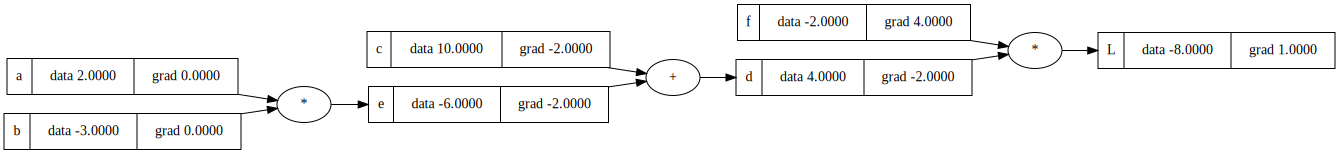

In [18]:
draw_dot(L)

$$
\begin{align*}
\frac{dL}{da} &= ? \\
\frac{dL}{db} &= ? \\

e &= a \cdot b \\
\frac{de}{da} &= b \\
\frac{de}{db} &= a \\
\frac{dL}{da} &= \frac{dL}{dd} \cdot \frac{dd}{de} \cdot \frac{de}{da} = f \cdot 1 \cdot b \\
\frac{dL}{db} &= \frac{dL}{dd} \cdot \frac{dd}{de} \cdot \frac{de}{db} = f \cdot 1 \cdot a
\end{align*}
$$


In [19]:
a.grad = e.grad  * 1 * b.data
b.grad = e.grad  * 1 * a.data

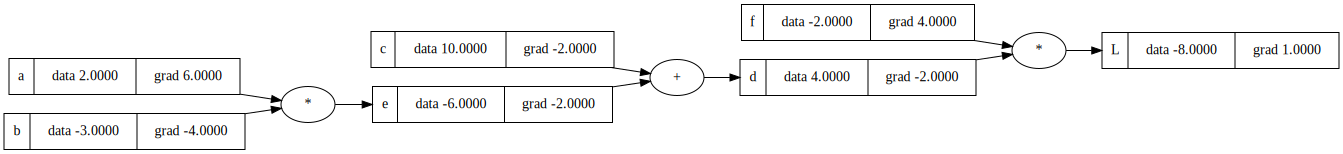

In [20]:
draw_dot(L)

Manual forward pass

In [21]:
a.data += a.grad * 0.01
b.data += b.grad * 0.01
c.data += c.grad * 0.01
f.data += f.grad * 0.01

e = a*b
d = e + c
L = d*f

print(L.data)

-7.286496


In [22]:
def lol():

    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0+h, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    # d.data += h
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print('dL/dL', (L2-L1)/h)

lol()

dL/dL -1.9999999999988916


tanh function

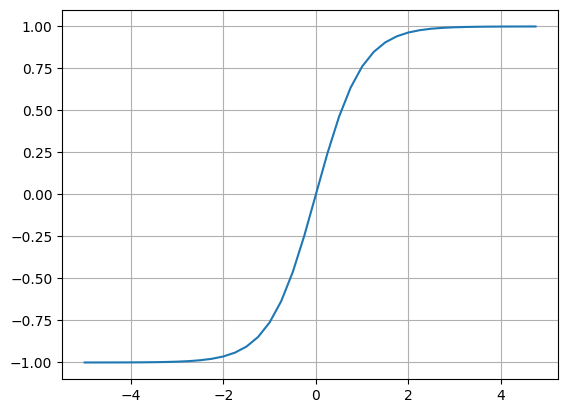

In [24]:
plt.plot(xs, np.tanh(xs))
plt.grid()

Second example of manual backpropagation

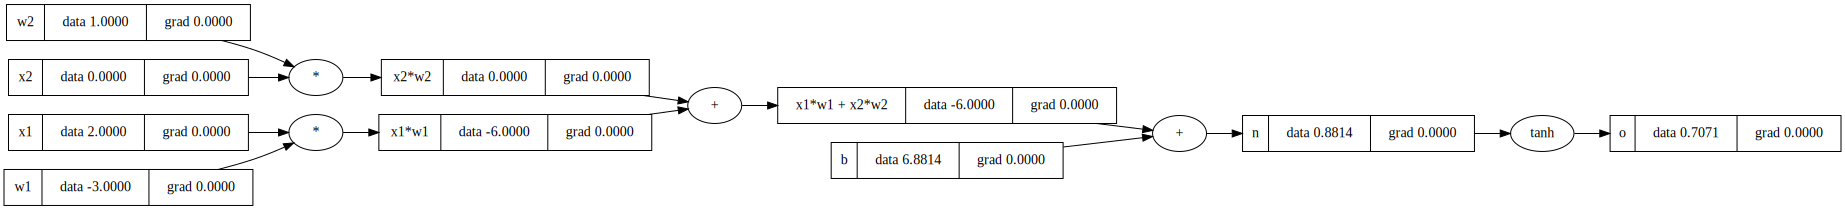

In [25]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias b
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [26]:
o.grad = 1.0

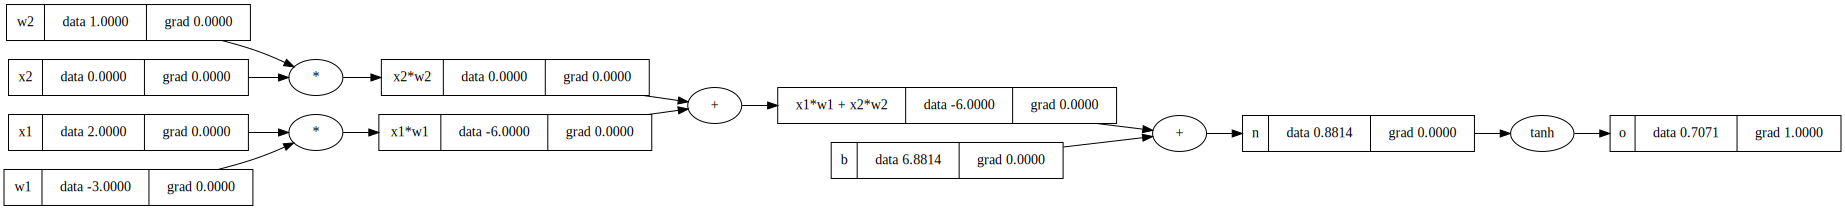

In [27]:
draw_dot(o)

do / dn

o = tanh(n)

do = 1 - tanh(n)**2 = 1 o**2

In [28]:
n.grad = (1 - o.data**2)

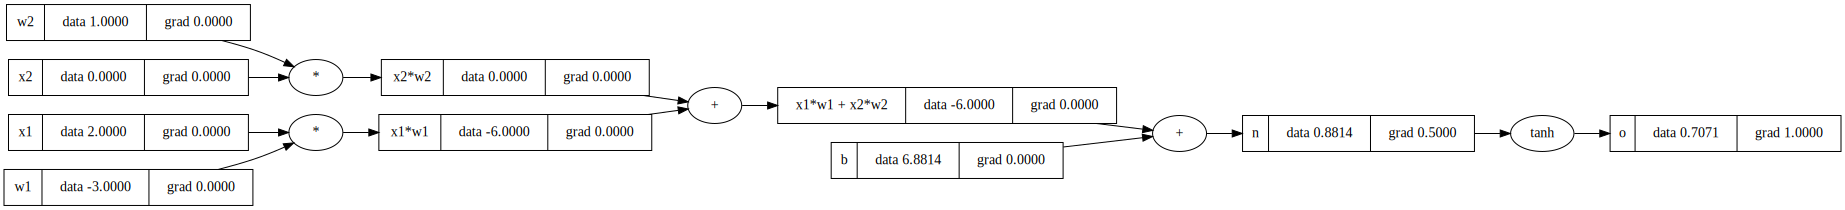

In [29]:
draw_dot(o)

In [30]:
b.grad = n.grad * 1
x1w1x2w2.grad = n.grad * 1

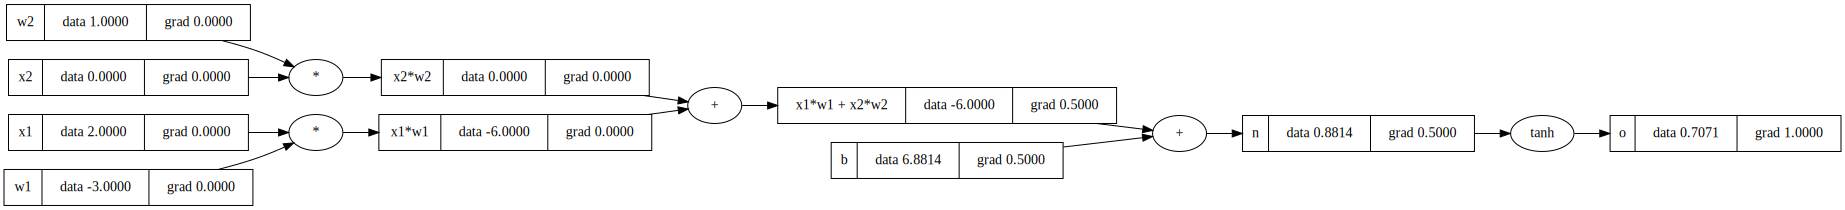

In [31]:
draw_dot(o)

In [32]:
x1w1.grad = x1w1x2w2.grad * 1
x2w2.grad = x1w1x2w2.grad * 1

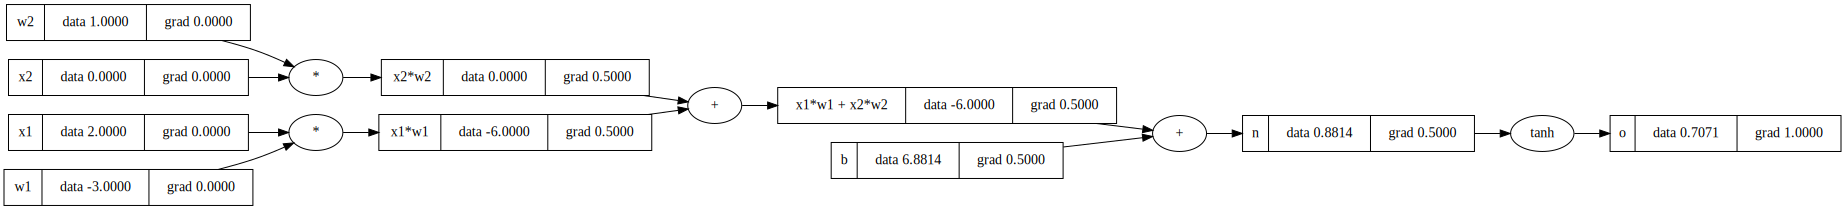

In [33]:
draw_dot(o)

x1w1 = x1 * w1

x2w2 = x2 * w2

dx1w1 / dx1 = x2

dx2w2 / dx2 = x1

In [34]:
x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data

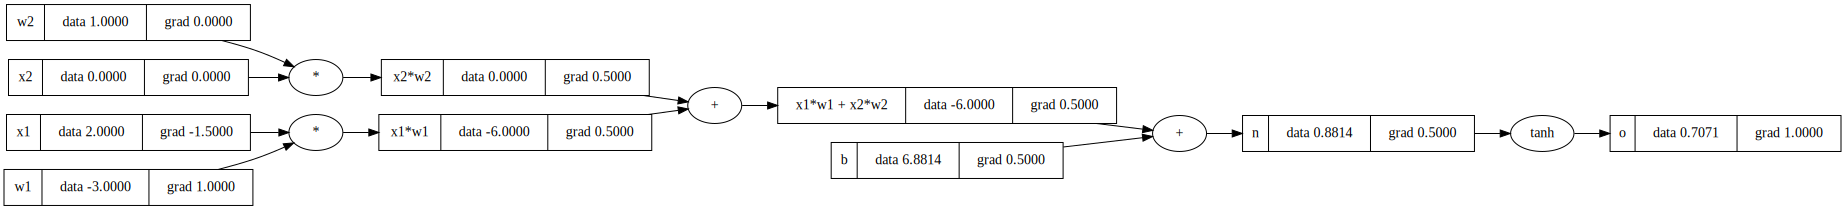

In [35]:
draw_dot(o)

In [36]:
x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data

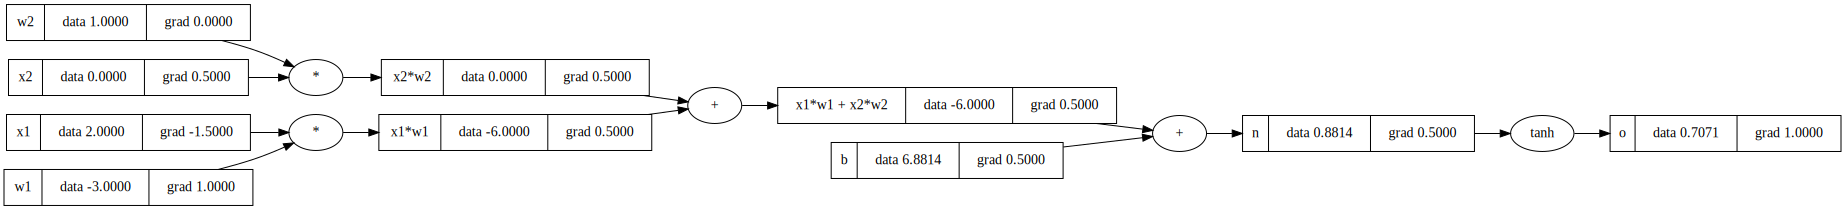

In [37]:
draw_dot(o)

Automation of the backpropagation

Reseting gradients

In [38]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias b
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
o = n.tanh(); o.label = 'o'

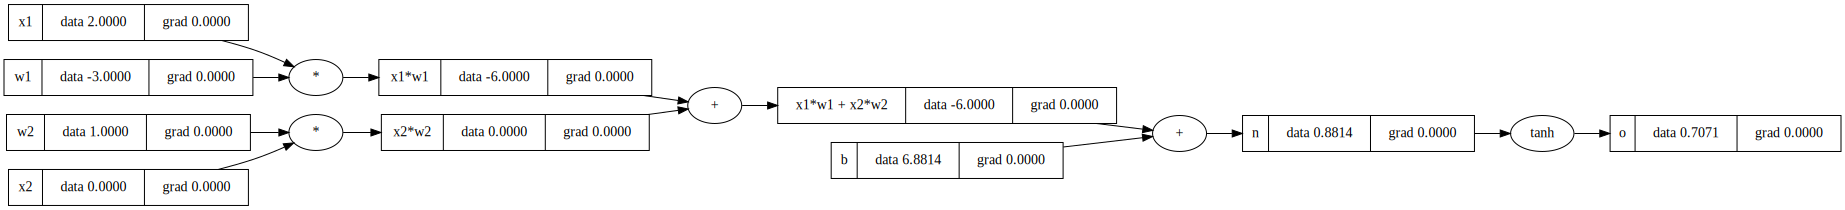

In [39]:
draw_dot(o)

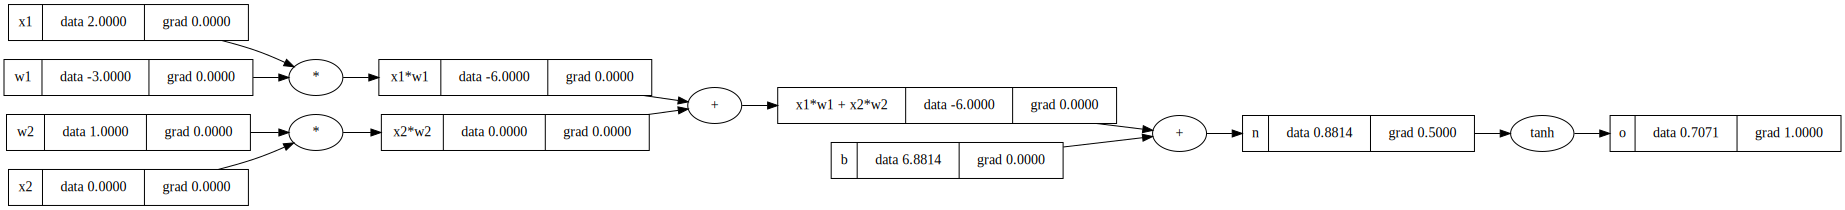

In [40]:
o.grad = 1.0
o._backward()
draw_dot(o)

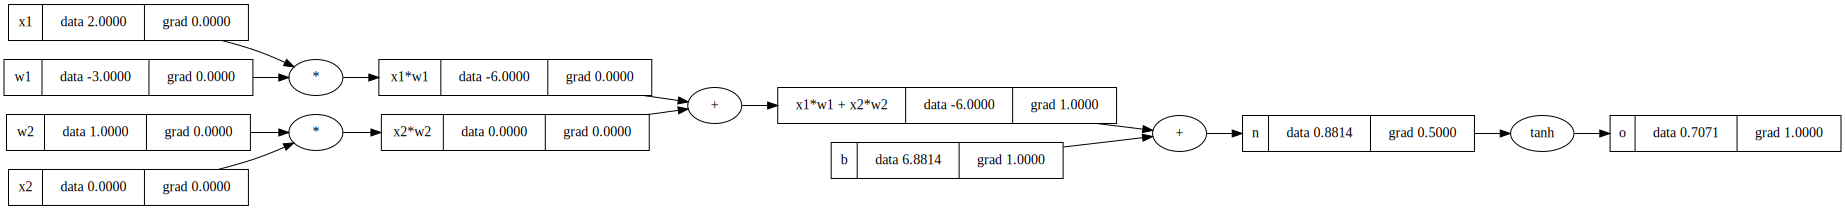

In [42]:
n._backward()
b._backward()
draw_dot(o)

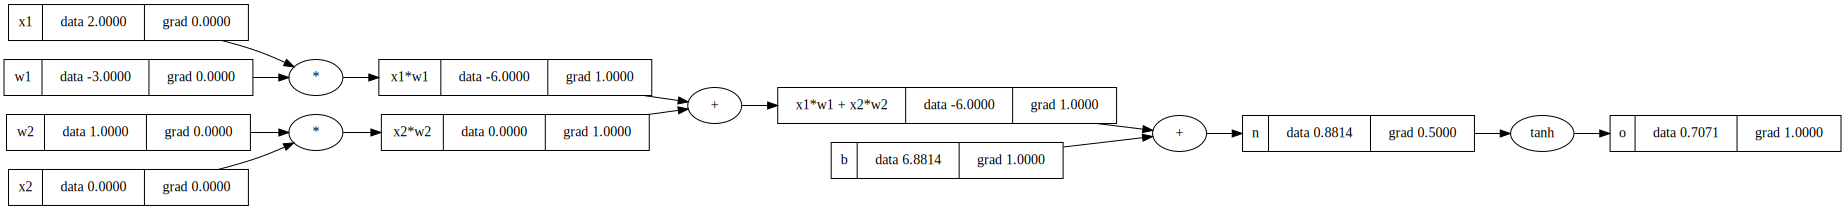

In [43]:
x1w1x2w2._backward()
draw_dot(o)

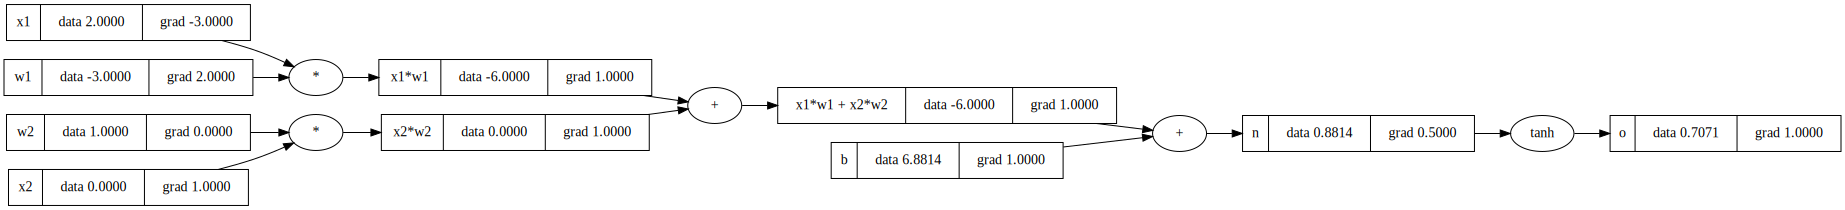

In [44]:
x2w2._backward()
x1w1._backward()
draw_dot(o)

Topological graph

In [45]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

### Explanation:

This code defines a topological sorting function, which is useful when dealing with directed graphs (like computational graphs in deep learning). Let's go step by step:

1. **`topo = []`**: 
   - This is an empty list that will eventually store the vertices of the graph in topological order (a linear ordering of vertices where for every directed edge `u -> v`, `u` comes before `v`).

2. **`visited = set()`**: 
   - `visited` is a set used to keep track of all nodes that have already been processed (visited). This avoids revisiting the same node and potentially falling into infinite loops when dealing with graphs that have cycles.
   - The `set()` function creates an empty set. A set is a data structure that stores unique elements and allows fast membership testing. So, when you check `if v not in visited`, it’s an efficient way to see if `v` has been processed before.
   
   **Why `set()`?**  
   - The use of `set()` helps ensure that nodes are only visited once because a set automatically handles duplicates (i.e., it only stores unique elements).
   - The method `visited.add(v)` adds the node `v` to the set, ensuring it won't be visited again.

3. **`build_topo(v)`**:
   - This is a recursive function that processes each vertex `v`.
   - It checks whether `v` has already been visited using the `visited` set. If not, it adds `v` to the `visited` set and processes all its children recursively using `for child in v._prev: build_topo(child)`.
   - Once all children of `v` are processed, `v` is added to the `topo` list.

4. **`build_topo(0)`**:
   - This line starts the recursive topological sorting with the vertex `0` (the starting node). It assumes that `v._prev` contains a list of preceding nodes connected to `v`.

5. **`topo`**:
   - After the recursion completes, `topo` will contain the nodes in topologically sorted order.

### Example Use Case:
This pattern is often used in dependency resolution, where you want to process nodes in a directed acyclic graph (DAG) in such a way that each node is processed after all its dependencies have been processed. For instance, in deep learning, it might be used to ensure that you compute gradients in the correct order in the backward pass.

Reseting gradients

In [46]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias b
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
o = n.tanh(); o.label = 'o'

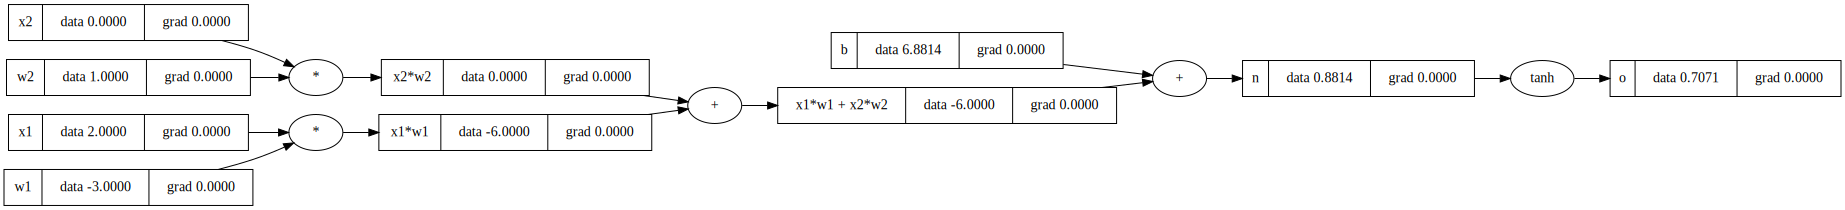

In [47]:
draw_dot(o)

In [48]:
o.grad = 1.0

def build_topo(v):

    topo = []
    visited = set()
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)


for node in reversed(topo):
    node._backward()

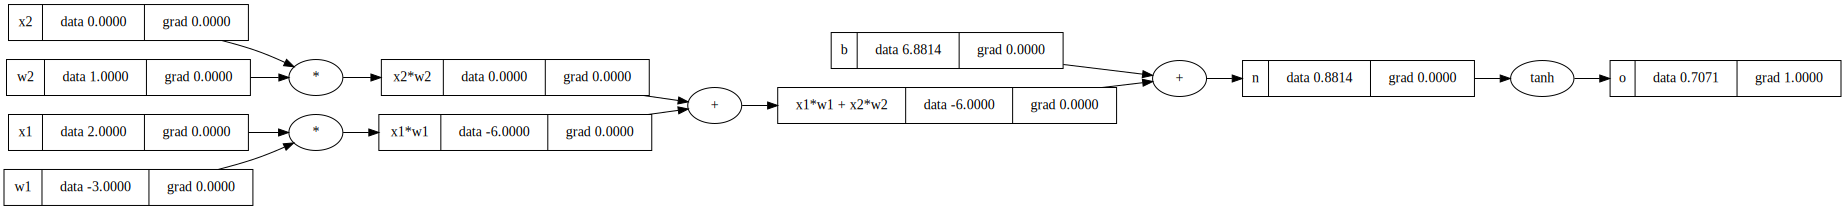

In [49]:
draw_dot(o)

Reseting gradients

In [57]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias b
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
o = n.tanh(); o.label = 'o'

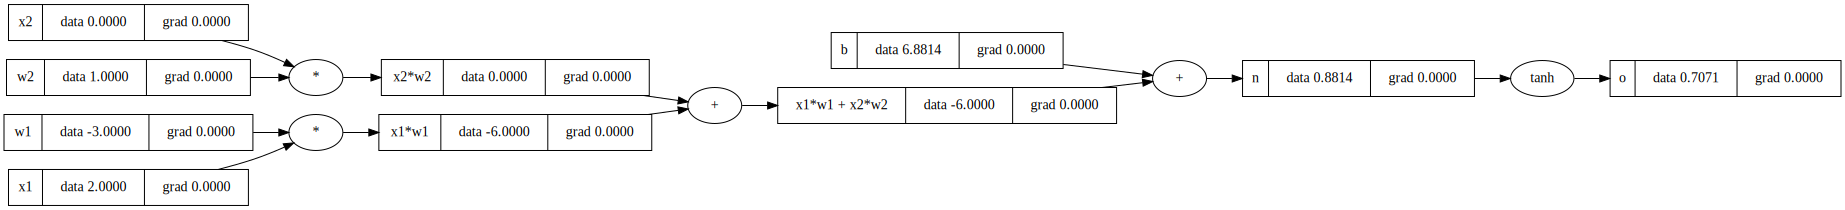

In [58]:
draw_dot(o)

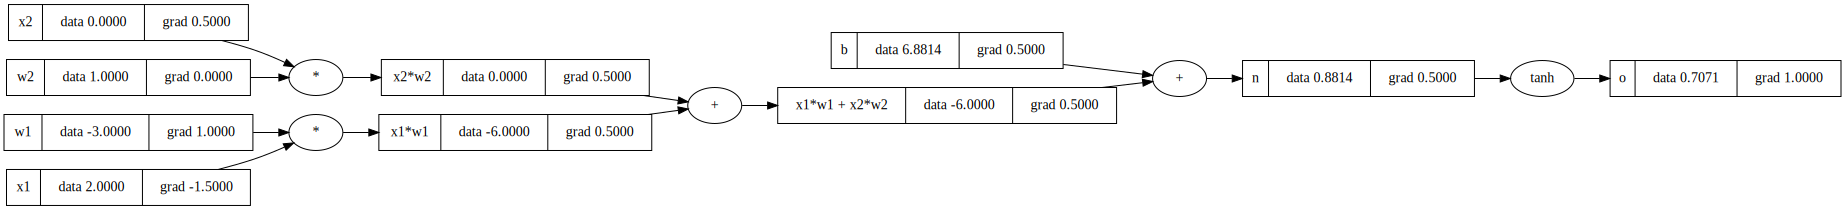

In [59]:
o.backward()
draw_dot(o)

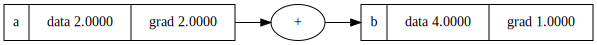

In [60]:
a = Value(2.0, label='a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

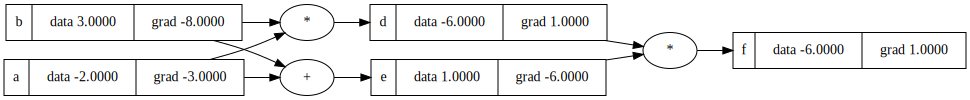

In [62]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a * b
d.label = 'd'
e = a + b
e.label = 'e'
f = d * e
f.label = 'f'

f.backward()
draw_dot(f)
